# **Descargar arquitectura YOLO**

In [3]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5 #clone repo
%cd yolov5
%pip install -qr requirements.txt #install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output #to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.58 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (11545/11545), done.
/content/yolov5/yolov5
Setup complete. Using torch 2.3.1+cu121 (CPU)


# **Sube el dataset de imagenes y descomprimelo**

In [7]:
!unzip -q /content/data.zip -d /content/

# **Entrena el modelo si tienes tu propio dataset de imagenes**

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 4 --epochs 150 --data /content/yolov5/yolov5/data/custom.yaml --weights yolov5x.pt --cache

2024-08-04 21:02:27.725127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 21:02:28.004395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 21:02:28.089668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=, data=/content/yolov5/yolov5/data/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=F

# **Si entrenaste el modelo puedes descargar el archivo best.pt que contiene los pesos para usarlos en cualqueir momento sin necesidad de volver a entrenar el modelo**

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('/content/yolov5/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

De esta forma usas los pesos que genero tu entrenamiento

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-5 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


# **Deteccion para imagen**

In [53]:
from matplotlib import pyplot as plt
from PIL import Image
# Cargar la imagen
img_path = '/content/prueba4.png'
img = Image.open(img_path)

In [54]:
# Realizar la detección
results = model(img)

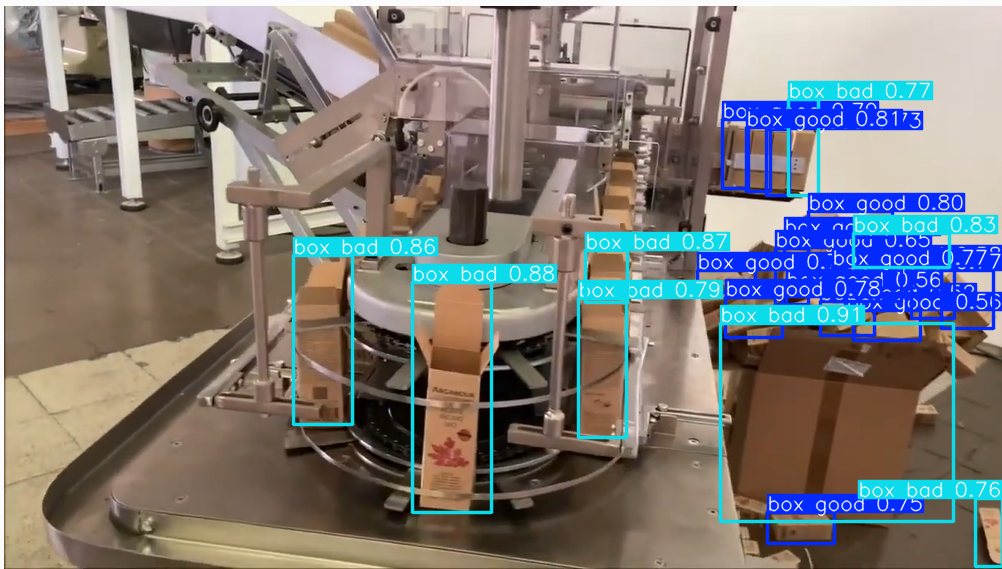

In [55]:
#Mostrar resultados
results.show()  # Esto abrirá una ventana con la imagen y los objetos detectados

# **Para hacer el Video**

In [ ]:
import cv2
from IPython.display import clear_output
from google.colab.patches import cv2_imshow  # Import cv2_imshow

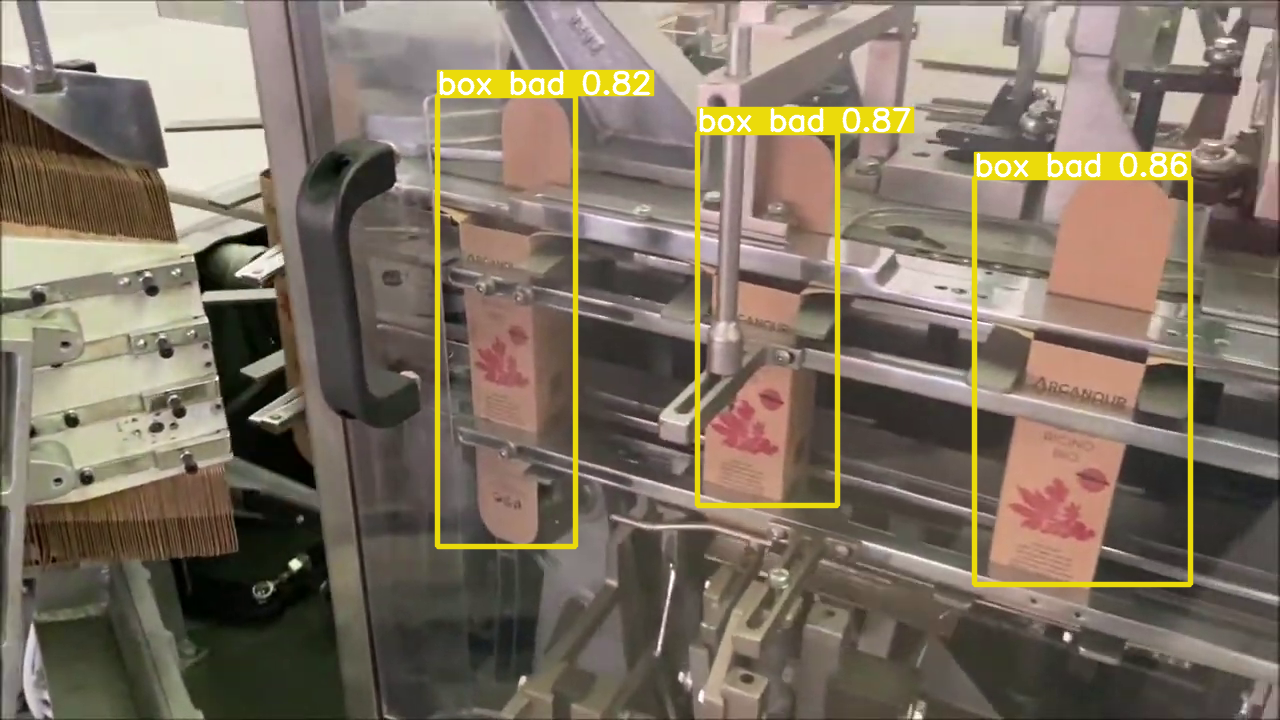

In [ ]:
# Abre el video
cap = cv2.VideoCapture('/content/videot.mp4')

# Obtiene las dimensiones del video original
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define el codec y crea un objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Puedes usar otros codecs como 'XVID'
out = cv2.VideoWriter('output_video.mp4', fourcc, 20.0, (frame_width, frame_height))  # Usa las dimensiones originales

# Loop a través de los frames del video
while cap.isOpened():
  # Lee un frame
  ret, frame = cap.read()
  if not ret:
    break

  # Realiza la detección de objetos
  results = model(frame)

  # Obtiene el frame con las detecciones
  frame_with_detections = results.render()[0]

  # Escribe el frame con detecciones en el archivo de salida
  out.write(frame_with_detections)

  # Muestra el frame con las detecciones (opcional)
  clear_output(wait=True)
  cv2_imshow(frame_with_detections)

  # Rompe el loop si se presiona la tecla 'q'
  if cv2.waitKey(1) == ord('q'):
    break


# Libera los recursos
cap.release()
out.release()
cv2.destroyAllWindows()
# Descarga el video
files.download('output_video.mp4')